In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# making get request of the URL
url = requests.get('http://covid.gov.pk/')

In [6]:
# Reading the excel for any previous data
raw_file = pd.read_excel('Spreadsheets/Corona Stats of Pakistan.xlsx')
raw_file.tail(7)

,CityNames,CityWiseCounts,Date,Headers,OverallCounts
21,ICT,131,2020-04-14,Recovered,"1,378"
22,Punjab,"2,881",2020-04-14,Critical,46
23,Sindh,"1,518",2020-04-14,Deaths,96
24,KP,800,2020-04-14,Cases (24 HRS),121
25,Balochistan,231,2020-04-14,Deaths (24 HRS),3
26,AJK,43,2020-04-14,Tests (24 HRS),"3,157"
27,GB,233,2020-04-14,Total Tests,"69,928"


In [7]:
# making copy of the raw file
df_file = raw_file.copy()
df_file.tail(7)

,CityNames,CityWiseCounts,Date,Headers,OverallCounts
21,ICT,131,2020-04-14,Recovered,"1,378"
22,Punjab,"2,881",2020-04-14,Critical,46
23,Sindh,"1,518",2020-04-14,Deaths,96
24,KP,800,2020-04-14,Cases (24 HRS),121
25,Balochistan,231,2020-04-14,Deaths (24 HRS),3
26,AJK,43,2020-04-14,Tests (24 HRS),"3,157"
27,GB,233,2020-04-14,Total Tests,"69,928"


In [8]:
# getting the content from the URL and then parsing it using the html parser
soup = BeautifulSoup(url.content, "html.parser")

In [ ]:
# soup

In [9]:
# below for loop finds the h2 heading, which is ConfirmedCases and h1 heading, which is the Count
lst = []
for g in soup.findAll('div', class_ = 'col-12 col-md-6 wow fadeInUp'):
    header_name = g.find('h2')
    header_count = g.find('h1')
#     print (header_count)
    details_pak = {
        "Name" : header_name.text,
        "Count" : header_count.text 
    }
    lst.append(details_pak)
    
print (lst)

[{'Name': 'ConfirmedCases', 'Count': '5,988'}]


In [10]:
# Making the DF from the list created above by the for loop
df_total_count = pd.DataFrame(lst)
df_total_count

,Count,Name
0,"5,988",ConfirmedCases


In [11]:
# Function to pull the data from specific class
lst_column_details = []
lst_count_details = []
def get_details(a, b, c):
#     a = []
    for g in soup.findAll('div', class_ = 'col-12 col-md-6 text-center numbers-child wow fadeInUp'):
        details = {}
        for i in g.findAll(a):
            details[b] = i.text
            c.append(details[b])
    return (c)

In [12]:
# Calling the function to pull the headings
get_details('h6', 'Columns', lst_column_details)

['Recovered',
 'Critical',
 'Deaths',
 'Cases (24 HRS)',
 'Deaths (24 HRS)',
 'Tests (24 HRS)',
 'Total Tests']

In [13]:
# calling the function to get the counts
get_details('h4', 'Counts', lst_count_details)

['1,446', '44', '107', '272', '11', '3,280', '73,439']

In [14]:
# Function to pull City names and City wise case counts
lst_cities = []
lst_cases = []
def get_citywise_details():
    for g in soup.findAll('div', class_='row provinc-stat'):
        names = g.findAll('a')
        for n in names:
            city_names = n.text
            dict_city = {
                "City": city_names
            }
            print (city_names)
            print (dict_city)
            lst_cities.append(dict_city)
        counts = g.findAll('h4')
        for c in counts:
            case_counts = c.text
            dict_cases = {
                "Counts": case_counts
            }
            print (case_counts)
            lst_cases.append(dict_cases)

In [15]:
# calling the function
get_citywise_details()

ICT
{'City': 'ICT'}
Punjab
{'City': 'Punjab'}
Sindh
{'City': 'Sindh'}
KP
{'City': 'KP'}
Balochistan
{'City': 'Balochistan'}
AJK
{'City': 'AJK'}
GB
{'City': 'GB'}
140
2,945
1,518
865
240
46
234


In [16]:
print (lst_cities)
print (lst_cases)

[{'City': 'ICT'}, {'City': 'Punjab'}, {'City': 'Sindh'}, {'City': 'KP'}, {'City': 'Balochistan'}, {'City': 'AJK'}, {'City': 'GB'}]
[{'Counts': '140'}, {'Counts': '2,945'}, {'Counts': '1,518'}, {'Counts': '865'}, {'Counts': '240'}, {'Counts': '46'}, {'Counts': '234'}]


In [17]:
# Creating DF from the lists of city names and city wise counts
df_citynames = pd.DataFrame(lst_cities)
df_citywise_cases = pd.DataFrame(lst_cases)

In [18]:
df_citynames

,City
0,ICT
1,Punjab
2,Sindh
3,KP
4,Balochistan
5,AJK
6,GB


In [19]:
df_citywise_cases

,Counts
0,140
1,"2,945"
2,"1,518"
3,865
4,240
5,46
6,234


In [20]:
# Creating DF from the list of h6 headings
df_col = pd.DataFrame(lst_column_details, columns=['ColumnNames'])
df_col

,ColumnNames
0,Recovered
1,Critical
2,Deaths
3,Cases (24 HRS)
4,Deaths (24 HRS)
5,Tests (24 HRS)
6,Total Tests


In [21]:
# Creating DF from the list of Counts for the h6 headings
df_counts = pd.DataFrame(lst_count_details, columns=['Counts'])
df_counts

,Counts
0,"1,446"
1,44
2,107
3,272
4,11
5,"3,280"
6,"73,439"


In [22]:
# Pulling today's time and formating it according to the requirement
today = dt.now().strftime("%Y-%m-%d")
# today

In [23]:
df_citynames

,City
0,ICT
1,Punjab
2,Sindh
3,KP
4,Balochistan
5,AJK
6,GB


In [24]:
# Creating an empty Dataframe
df_final = pd.DataFrame()

In [27]:
# Filling the above empty frame with the Data
df_final['CityNames'] = df_citynames.City
df_final['Date'] = today
df_final['CityWiseCounts'] = df_citywise_cases.Counts
df_final['Headers'] = df_col['ColumnNames']
df_final['OverallCounts'] = df_counts['Counts']
df_final['ConfirmedCases'] = df_total_count.Count.iloc[0]

In [28]:
df_final

,CityNames,Date,CityWiseCounts,Headers,OverallCounts,ConfirmedCases
0,ICT,2020-04-15,140,Recovered,"1,446","5,988"
1,Punjab,2020-04-15,"2,945",Critical,44,"5,988"
2,Sindh,2020-04-15,"1,518",Deaths,107,"5,988"
3,KP,2020-04-15,865,Cases (24 HRS),272,"5,988"
4,Balochistan,2020-04-15,240,Deaths (24 HRS),11,"5,988"
5,AJK,2020-04-15,46,Tests (24 HRS),"3,280","5,988"
6,GB,2020-04-15,234,Total Tests,"73,439","5,988"


In [29]:
# Appending the raw file's data frame with the newly created dataframe and also resetting the index
df_file = df_file.append(df_final).reset_index()
df_file

/Users/Muhammad/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,index,CityNames,CityWiseCounts,ConfirmedCases,Date,Headers,OverallCounts
0,0,ICT,102,NaN,2020-04-09,Recovered,572
1,1,Punjab,"2,171",NaN,2020-04-09,Critical,31
2,2,Sindh,"1,128",NaN,2020-04-09,Deaths,63
3,3,KP,560,NaN,2020-04-09,Cases (24 HRS),92
4,4,Balochistan,212,NaN,2020-04-09,Deaths (24 HRS),5
5,5,AJK,28,NaN,2020-04-09,Tests (24 HRS),"2,737"
6,6,GB,213,NaN,2020-04-09,Total Tests,"44,896"
7,7,ICT,107,NaN,2020-04-10,Recovered,727
8,8,Punjab,"2,279",NaN,2020-04-10,Critical,45
9,9,Sindh,"1,128",NaN,2020-04-10,Deaths,66


In [30]:
df_file.Date = df_file.Date.astype(str)
# df_final.Date

In [31]:
df_file.Date = df_file.Date.str.replace(' 00:00:00', '')
# df_final.Date

In [32]:
df_file.drop(columns=['index'], inplace=True)

In [34]:
df_file.tail(14)

,CityNames,CityWiseCounts,ConfirmedCases,Date,Headers,OverallCounts
21,ICT,131,NaN,2020-04-14,Recovered,"1,378"
22,Punjab,"2,881",NaN,2020-04-14,Critical,46
23,Sindh,"1,518",NaN,2020-04-14,Deaths,96
24,KP,800,NaN,2020-04-14,Cases (24 HRS),121
25,Balochistan,231,NaN,2020-04-14,Deaths (24 HRS),3
26,AJK,43,NaN,2020-04-14,Tests (24 HRS),"3,157"
27,GB,233,NaN,2020-04-14,Total Tests,"69,928"
28,ICT,140,"5,988",2020-04-15,Recovered,"1,446"
29,Punjab,"2,945","5,988",2020-04-15,Critical,44
30,Sindh,"1,518","5,988",2020-04-15,Deaths,107


In [35]:
# getting city wise date and counts and assigning to variables
ict = df_file.loc[df_file['CityNames'] == 'ICT', ['CityWiseCounts', 'Date']]
punjab = df_file.loc[df_file['CityNames'] == 'Punjab', ['CityWiseCounts', 'Date']]
sindh = df_file.loc[df_file['CityNames'] == 'Sindh', ['CityWiseCounts', 'Date']]
kp = df_file.loc[df_file['CityNames'] == 'KP', ['CityWiseCounts', 'Date']]
balochistan = df_file.loc[df_file['CityNames'] == 'Balochistan', ['CityWiseCounts', 'Date']]
ajk = df_file.loc[df_file['CityNames'] == 'AJK', ['CityWiseCounts', 'Date']]
gb = df_file.loc[df_file['CityNames'] == 'GB', ['CityWiseCounts', 'Date']]

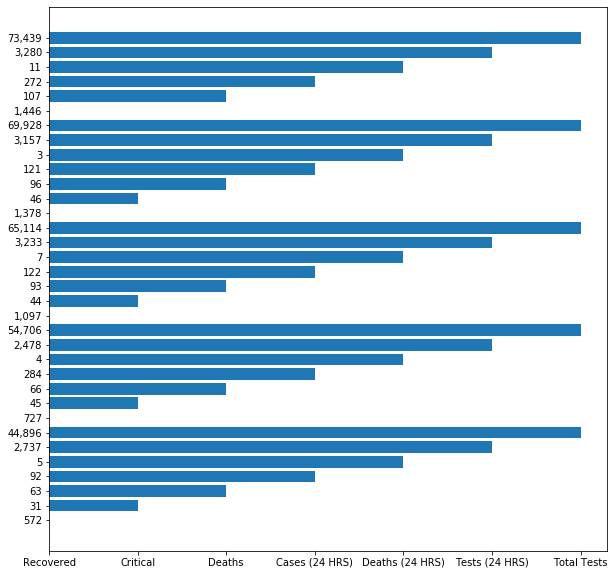

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
plt.barh(df_file.OverallCounts, width=df_file.Headers)
plt.show()

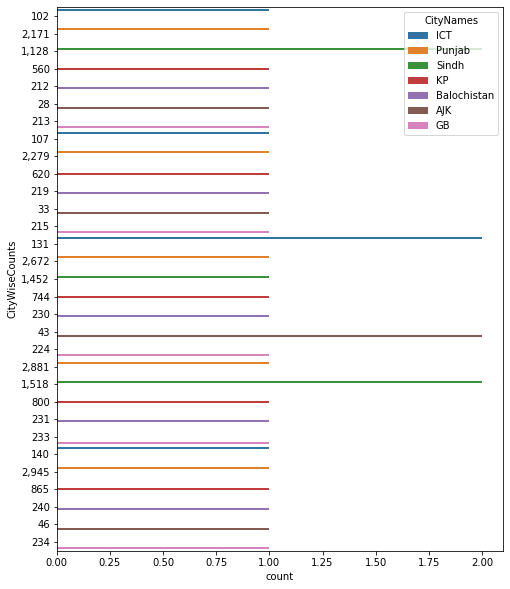

In [40]:
plt.figure(figsize=(8, 10))
sns.countplot(y='CityWiseCounts', data=df_file, hue='CityNames')

<function matplotlib.pyplot.show(*args, **kw)>

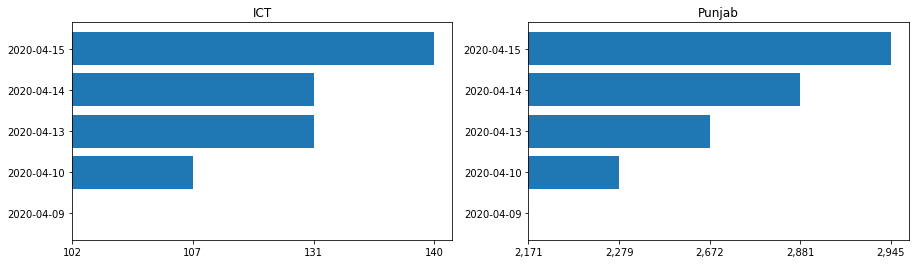

In [41]:
plt.figure(figsize = (15, 4))

plt.subplot (1,2,1)

plt.barh(ict.Date, ict.CityWiseCounts)
plt.title('ICT')

plt.subplot (1,2,2)
plt.barh(punjab.Date, punjab.CityWiseCounts)
plt.title('Punjab')

plt.show

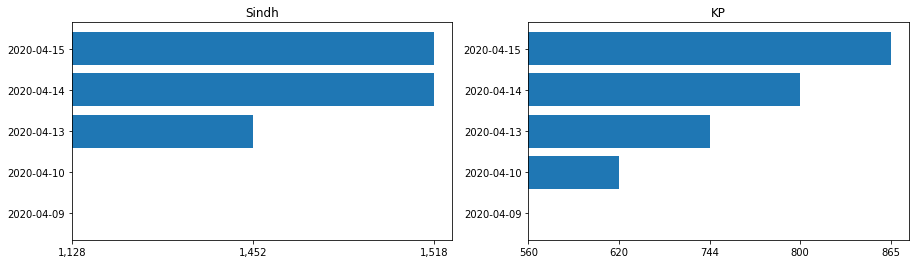

In [42]:
plt.figure(figsize = (15, 4))
plt.subplot (1,2,1)
plt.barh(sindh.Date, sindh.CityWiseCounts)
plt.title('Sindh')

plt.subplot(1,2,2)
plt.barh(kp.Date, kp.CityWiseCounts)
plt.title('KP')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

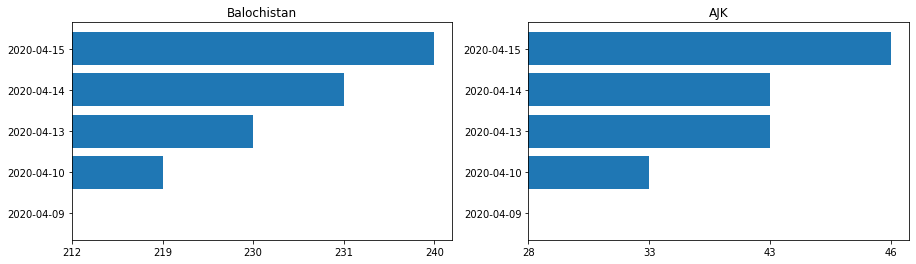

In [43]:
plt.figure(figsize = (15, 4))

plt.subplot (1,2,1)

plt.barh(balochistan.Date, balochistan.CityWiseCounts)
plt.title('Balochistan')

plt.subplot (1,2,2)
plt.barh(ajk.Date, ajk.CityWiseCounts)
plt.title('AJK')

plt.show

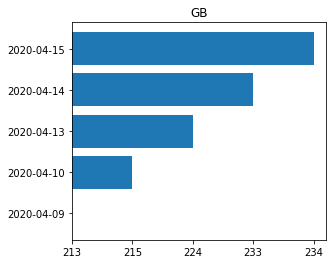

In [44]:
plt.figure(figsize = (10, 4))

plt.subplot (1,2,1)

plt.barh(gb.Date, gb.CityWiseCounts)
plt.title('GB')

plt.show()

In [45]:
df_file.to_excel('Spreadsheets/Corona Stats of Pakistan.xlsx', index=False)